In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
SEGMENT = 1

In [37]:
df = pd.read_csv(f'../preprocess/all_segments/segment{SEGMENT}.csv')

df.dropna(inplace=True)
df

,Unnamed: 0,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time_in_seconds,length,weather,date_in_week,hour,time_interval,part_of_day
0,0,1.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,69.0,0.6261,1,Friday,6,6-7,morning
1,15,8.0,274.0,1.0,1.0,2021-10-01,08:40:27,08:41:41,74.0,0.6261,1,Friday,8,8-9,morning
2,30,10.0,123.0,1.0,1.0,2021-10-01,09:11:33,09:13:36,123.0,0.6261,1,Friday,9,9-10,morning
3,39,15.0,262.0,1.0,1.0,2021-10-01,10:21:38,10:23:06,88.0,0.6261,1,Friday,10,10-11,morning
4,54,21.0,274.0,1.0,1.0,2021-10-01,11:51:31,11:53:44,133.0,0.6261,1,Friday,11,11-12,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,171189,25364.0,1166.0,1.0,1.0,2022-11-01,16:40:56,16:43:10,134.0,0.6300,1,Tuesday,16,16-17,afternoon
7041,171204,25366.0,1358.0,1.0,1.0,2022-11-01,17:00:34,17:02:49,135.0,0.6300,1,Tuesday,17,17-18,afternoon
7042,171217,25368.0,284.0,1.0,1.0,2022-11-01,17:51:04,17:53:40,156.0,0.6300,1,Tuesday,17,17-18,afternoon
7043,171232,25369.0,513.0,1.0,1.0,2022-11-01,18:08:04,18:10:01,117.0,0.6300,1,Tuesday,18,18-19,afternoon


In [38]:

df = pd.get_dummies(df, columns=['date_in_week'])
def label_encoding(x):
    help = {
        'Monday':2,
        'Tuesday':3,
        'Wednesday': 4,
        'Thursday': 5,
        'Friday': 6,
        'Saturday': 7,
        'Sunday': 1,
        'morning': 0,
        'afternoon': 1,
        'evening': 2
    }
    return help[x]

df['part_of_day'] = df['part_of_day'].apply(label_encoding)

df

,Unnamed: 0,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time_in_seconds,length,...,hour,time_interval,part_of_day,date_in_week_Friday,date_in_week_Monday,date_in_week_Saturday,date_in_week_Sunday,date_in_week_Thursday,date_in_week_Tuesday,date_in_week_Wednesday
0,0,1.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,69.0,0.6261,...,6,6-7,0,True,False,False,False,False,False,False
1,15,8.0,274.0,1.0,1.0,2021-10-01,08:40:27,08:41:41,74.0,0.6261,...,8,8-9,0,True,False,False,False,False,False,False
2,30,10.0,123.0,1.0,1.0,2021-10-01,09:11:33,09:13:36,123.0,0.6261,...,9,9-10,0,True,False,False,False,False,False,False
3,39,15.0,262.0,1.0,1.0,2021-10-01,10:21:38,10:23:06,88.0,0.6261,...,10,10-11,0,True,False,False,False,False,False,False
4,54,21.0,274.0,1.0,1.0,2021-10-01,11:51:31,11:53:44,133.0,0.6261,...,11,11-12,0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,171189,25364.0,1166.0,1.0,1.0,2022-11-01,16:40:56,16:43:10,134.0,0.6300,...,16,16-17,1,False,False,False,False,False,True,False
7041,171204,25366.0,1358.0,1.0,1.0,2022-11-01,17:00:34,17:02:49,135.0,0.6300,...,17,17-18,1,False,False,False,False,False,True,False
7042,171217,25368.0,284.0,1.0,1.0,2022-11-01,17:51:04,17:53:40,156.0,0.6300,...,17,17-18,1,False,False,False,False,False,True,False
7043,171232,25369.0,513.0,1.0,1.0,2022-11-01,18:08:04,18:10:01,117.0,0.6300,...,18,18-19,1,False,False,False,False,False,True,False


In [39]:
# Extract the training and test data
data = df.values
X = data[:,[1,2,3,10,13,14,15,16,17,18,19,20]]
y = data[:,8]
X

array([[1.0, 262.0, 1.0, ..., False, False, False],
       [8.0, 274.0, 1.0, ..., False, False, False],
       [10.0, 123.0, 1.0, ..., False, False, False],
       ...,
       [25368.0, 284.0, 1.0, ..., False, True, False],
       [25369.0, 513.0, 1.0, ..., False, True, False],
       [25370.0, 121.0, 1.0, ..., False, True, False]], dtype=object)

In [40]:
# Tính Z-score cho mỗi cột trong dữ liệu X
z_scores = np.abs((X - X.mean()) / X.std())

# Định một ngưỡng Z-score tùy ý (ví dụ: 3.0) để xác định outlier
threshold = 2.0

# Loại bỏ các dòng chứa outlier
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[(z_scores < threshold).all(axis=1)]
X = X_no_outliers
y = y_no_outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

array([[1.0, 262.0, 1.0, ..., False, False, False],
       [8.0, 274.0, 1.0, ..., False, False, False],
       [10.0, 123.0, 1.0, ..., False, False, False],
       ...,
       [8575.0, 279.0, 1.0, ..., False, False, False],
       [8577.0, 1409.0, 1.0, ..., False, False, False],
       [8578.0, 1358.0, 1.0, ..., False, False, False]], dtype=object)

In [41]:
# # Scale the data to be between 0 and 1
# #scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler.fit(X_train[:,[0,1,2,3,5]])
# X_train = scaler.transform(X_train[:,[0,1,2,3,5]])
# X_test = scaler.transform(X_test[:,[0,1,2,3,5]])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[0.92630597, 0.78665003, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2447528 , 0.78665003, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85645989, 0.80598877, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.76119403, 0.80598877, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.92024254, 0.64067374, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24358675, 0.64067374, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Đánh giá mô hình
## Đánh Giá Chỉ Số Đánh Giá (Evaluation Metrics)
* `Mean Squared Error (MSE)`: Đo lường trung bình của bình phương của sai số giữa giá trị dự đoán và giá trị thực tế. Giá trị MSE càng thấp, mô hình càng chính xác.
* `Root Mean Squared Error (RMSE)`: Đây là căn bậc hai của MSE, giúp chúng ta hiểu sai số trung bình một cách dễ dàng hơn.
* `Mean Absolute Error (MAE)`: Đo lường trung bình của giá trị tuyệt đối của sai số giữa giá trị dự đoán và giá trị thực tế.
* `R-Squared (R2
)`: Được tính dựa trên tổng phương sai được giải thích bởi mô hình và tổng phương sai của biến phụ thuộc. Giá trị R2 nằm trong khoảng từ 0 đến 1; giá trị càng gần 1, mô hình càng tốt trong việc dự đoán dữ liệu.

In [42]:
# Khởi tạo mô hình SVM với kernel tuyến tính và siêu tham số C mặc định
svm_regressor = SVR(kernel='rbf', C=10, epsilon=24)

# Khởi tạo mô hình RandomForestRegressor với số cây (n_estimators) và các tham số khác
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=24)


# Huấn luyện mô hình trên tập huấn luyện
rf_regressor.fit(X_train, y_train)
svm_regressor.fit(X_train, y_train)
# knn_regressor.fit(X_train, y_train)



# Dự đoán thời gian đến trên tập kiểm tra
y_pred_rf = rf_regressor.predict(X_test)
y_pred_svm = svm_regressor.predict(X_test)


# Đánh giá mô hình bằng metrics
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_svm = math.sqrt(mse_svm)
rmse_rf = math.sqrt(mse_rf)

r2_svm = r2_score(y_test, y_pred_svm)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"Mean Absolute Error (SVM): {mae_svm}")
print(f"Mean Squared Error (SVM): {mse_svm}")
print(f"Root Mean Squared Error (SVM): {rmse_svm}")
print(f"R-squared (SVM): {r2_svm}\n")


print(f"Mean Absolute Error (RF): {mae_rf}")
print(f"Mean Squared Error (RF): {mse_rf}")
print(f"Root Mean Squared Error (RF): {rmse_rf}")
print(f"R-squared (RF): {r2_rf}")

Mean Absolute Error (SVM): 19.64650941788193
Mean Squared Error (SVM): 840.3442714230589
Root Mean Squared Error (SVM): 28.98869213026105
R-squared (SVM): 0.3429522343755399

Mean Absolute Error (RF): 19.980596107055955
Mean Squared Error (RF): 757.6688875304136
Root Mean Squared Error (RF): 27.525785865809784
R-squared (RF): 0.4075944031938238


**Nhận xét:**
1. **Mean Absolute Error (MAE)**: MAE đo lường trung bình của độ chênh lệch giữa giá trị dự đoán và giá trị thực tế. Cả hai mô hình đều có MAE khá gần nhau (19.05 cho SVM và 19.98 cho RF), cho thấy trung bình, cả hai mô hình dự đoán giá trị với sai số tương tự.
2. **Mean Squared Error (MSE)**: MSE tính trung bình của bình phương độ chênh lệch giữa giá trị dự đoán và giá trị thực tế. Giá trị MSE thấp hơn cho SVM (702.19 so với 757.67 cho RF), cho thấy SVM có xu hướng dự đoán gần hơn với giá trị thực tế so với RF.
3. **Root Mean Squared Error (RMSE)**: RMSE là căn bậc hai của MSE và thường được sử dụng để đánh giá sai số dự đoán trong cùng đơn vị với dữ liệu. Giá trị RMSE thấp hơn cho SVM (26.50 so với 27.53 cho RF), lại cho thấy SVM có xu hướng dự đoán gần với giá trị thực tế hơn.
4. **R-squared (R²)**: R² là tỷ lệ giữa sự biến thiên được mô hình giải thích so với tổng biến thiên của dữ liệu. Giá trị R² gần 1 (0.451 cho SVM và 0.408 cho RF) cho thấy mô hình giải thích được một phần lớn sự biến thiên trong dữ liệu. SVM có giá trị R² cao hơn so với RF, ngụ ý rằng SVM có khả năng giải thích tốt hơn về mức độ biến thiên trong dữ liệu.

Tóm lại, dựa trên các chỉ số này, SVM thường cho thấy hiệu suất tốt hơn so với RF trong việc dự đoán giá trị thực của dữ liệu. Cả hai mô hình đều có các giá trị sai số tương đối gần nhau, nhưng SVM có xu hướng dự đoán gần với giá trị thực tế hơn và giải thích được một phần lớn sự biến thiên trong dữ liệu hơn so với RF.

## Kiểm tra đồng thời trên tập huấn luyện và kiểm thử
Đảm bảo rằng mô hình không chỉ hoạt động tốt trên tập dữ liệu huấn luyện mà còn trên tập kiểm
thử để tránh tình trạng quá mức khớp (overfitting).

In [43]:
# Dự đoán trên tập huấn luyện
y_train_pred_rf = rf_regressor.predict(X_train)
y_train_pred_svm = svm_regressor.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
mae_svm_train = mean_absolute_error(y_train, y_train_pred_svm)
mae_rf_train = mean_absolute_error(y_train, y_train_pred_rf)

mse_svm_train = mean_squared_error(y_train, y_train_pred_svm)
mse_rf_train = mean_squared_error(y_train, y_train_pred_rf)

rmse_svm_train = math.sqrt(mse_svm_train)
rmse_rf_train = math.sqrt(mse_rf_train)

r2_svm_train = r2_score(y_train, y_train_pred_svm)
r2_rf_train = r2_score(y_train, y_train_pred_rf)

# In kết quả trên tập huấn luyện
print("Đánh Giá Trên Tập Huấn Luyện:")
print("SVM - Mean Absolute Error (MAE):", mae_svm_train)
print("SVM - Mean Squared Error (MSE):", mse_svm_train)
print("SVM - Root Mean Squared Error (RMSE):", rmse_svm_train)
print("SVM - R-squared (R2):", r2_svm_train)

print("\nRandom Forest - Mean Absolute Error (MAE):", mae_rf_train)
print("Random Forest - Mean Squared Error (MSE):", mse_rf_train)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf_train)
print("Random Forest - R-squared (R2):", r2_rf_train)

# Đánh giá mô hình trên tập kiểm thử đã được tính trước đó
print("\nĐánh Giá Trên Tập Kiểm Thử:")
print("SVM - Mean Absolute Error (MAE):", mae_svm)
print("SVM - Mean Squared Error (MSE):", mse_svm)
print("SVM - Root Mean Squared Error (RMSE):", rmse_svm)
print("SVM - R-squared (R2):", r2_svm)

print("\nRandom Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Root Mean Squared Error (RMSE):", rmse_rf)
print("Random Forest - R-squared (R2):", r2_rf)


Đánh Giá Trên Tập Huấn Luyện:
SVM - Mean Absolute Error (MAE): 19.00258874924974
SVM - Mean Squared Error (MSE): 817.3104381977258
SVM - Root Mean Squared Error (RMSE): 28.588641769026484
SVM - R-squared (R2): 0.3470764379409652

Random Forest - Mean Absolute Error (MAE): 7.196359489051095
Random Forest - Mean Squared Error (MSE): 104.8435979470803
Random Forest - Root Mean Squared Error (RMSE): 10.239316283184161
Random Forest - R-squared (R2): 0.9162437523964031

Đánh Giá Trên Tập Kiểm Thử:
SVM - Mean Absolute Error (MAE): 19.64650941788193
SVM - Mean Squared Error (MSE): 840.3442714230589
SVM - Root Mean Squared Error (RMSE): 28.98869213026105
SVM - R-squared (R2): 0.3429522343755399

Random Forest - Mean Absolute Error (MAE): 19.980596107055955
Random Forest - Mean Squared Error (MSE): 757.6688875304136
Random Forest - Root Mean Squared Error (RMSE): 27.525785865809784
Random Forest - R-squared (R2): 0.4075944031938238


**Nhận xét**:
Việc đánh giá overfitting là một bước quan trọng để xác định xem mô hình của bạn có học được các mẫu từ dữ liệu huấn luyện quá mức không. Overfitting xảy ra khi mô hình học được các chi tiết và nhiễu trong dữ liệu huấn luyện mà không thể tổng quát hóa được cho dữ liệu mới.
Theo dõi giá trị của các độ đo lỗi như mean squared error (MSE) trong bài toán hồi quy trên cả tập huấn luyện và tập kiểm tra. Nếu giá trị lỗi trên tập huấn luyện giảm dần nhưng trên tập kiểm tra tăng lên, có thể là dấu hiệu của overfitting.
1. **SVM**: Trên tập huấn luyện, SVM có MAE là khoảng 18.13, MSE là khoảng 656.71, RMSE là khoảng 25.63 và R-squared (R2) là khoảng 0.48. Tuy nhiên, trên tập kiểm thử, SVM cho thấy MAE là khoảng 19.05, MSE là khoảng 702.19, RMSE là khoảng 26.50 và R2 là khoảng 0.45. Ta có thể thấy giá trị lỗi trên tập Test tăng hơn so với tập Train. Tuy nhiên, giá trị chênh lệch này không lớn. Cho thấy mô hình SVM đang chỉ có **dấu hiệu nhỏ của việc overfitting.**
2. **Random Forest**: Ngược lại, với Random Forest ta có thể thấy rõ ràng các giá trị lỗi (error metrics)
trên tập Test tăng rất nhiều. Cho thấy mô hình không dự đoán chính xác giá trị trên tập kiểm thử.
Trong khi đó, các chỉ số lỗi từ tập Train lại khá lý tưởng khi `Rˆ2 tới 92%`, RMSE chỉ vỏn vẹn 10
giây. Điều này là một dấu hiệu **rõ ràng của overfitting**. Mô hình đã không tổng quát hóa tốt trên
dữ liệu mới và cần phải dùng các phương pháp khác để giảm hiện tượng overfitting này.

In [44]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np
# 
# # Số lượng fold trong cross-validation
# num_folds = 5
# 
# # Khởi tạo mô hình SVM và Random Forest
# svm_regressor = SVR(kernel='rbf', C=170, epsilon=24)
# rf_regressor = RandomForestRegressor(n_estimators=200, random_state=24)
# 
# # Khởi tạo đối tượng KFold
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# 
# # Danh sách để lưu kết quả đánh giá
# svm_mae_scores = []
# rf_mae_scores = []
# 
# # Thực hiện k-fold cross-validation
# for train_index, test_index in kf.split(X_train):
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
#     
#     # Huấn luyện mô hình SVM
#     svm_regressor.fit(X_train_fold, y_train_fold)
#     y_pred_svm = svm_regressor.predict(X_test_fold)
#     svm_mae_scores.append(mean_absolute_error(y_test_fold, y_pred_svm))
#     
#     # Huấn luyện mô hình Random Forest
#     rf_regressor.fit(X_train_fold, y_train_fold)
#     y_pred_rf = rf_regressor.predict(X_test_fold)
#     rf_mae_scores.append(mean_absolute_error(y_test_fold, y_pred_rf))
# 
# # Tính trung bình MAE từ các fold
# svm_avg_mae = np.mean(svm_mae_scores)
# rf_avg_mae = np.mean(rf_mae_scores)
# 
# # In kết quả
# print(f"Trung bình MAE của SVM qua {num_folds} fold: {svm_avg_mae}")
# print(f"Trung bình MAE của Random Forest qua {num_folds} fold: {rf_avg_mae}")


In [45]:
# # # Try to get the lowest RMSE by using different Epsilon value
# epsilons = np.arange(10,30)
# scores = []
# for e in epsilons:
#     svm_regressor.set_params(epsilon=e)
#     svm_regressor.fit(X_train, y_train)
#     scores.append(math.sqrt(mean_squared_error(y_test, svm_regressor.predict(X_test))))
# plt.plot(epsilons, scores)
# plt.title("Epsilon effect")
# plt.xlabel("epsilon")
# plt.ylabel("RMSE")
# plt.show()

### Đồ thị dự đoán so với thực tế
Vẽ biểu đồ để so sánh giữa giá trị dự đoán và giá trị thực tế. Nếu các điểm dữ liệu trên đồ thị gần
đường thẳng 45 độ, điều này chỉ ra rằng mô hình của ta đang dự đoán tốt.

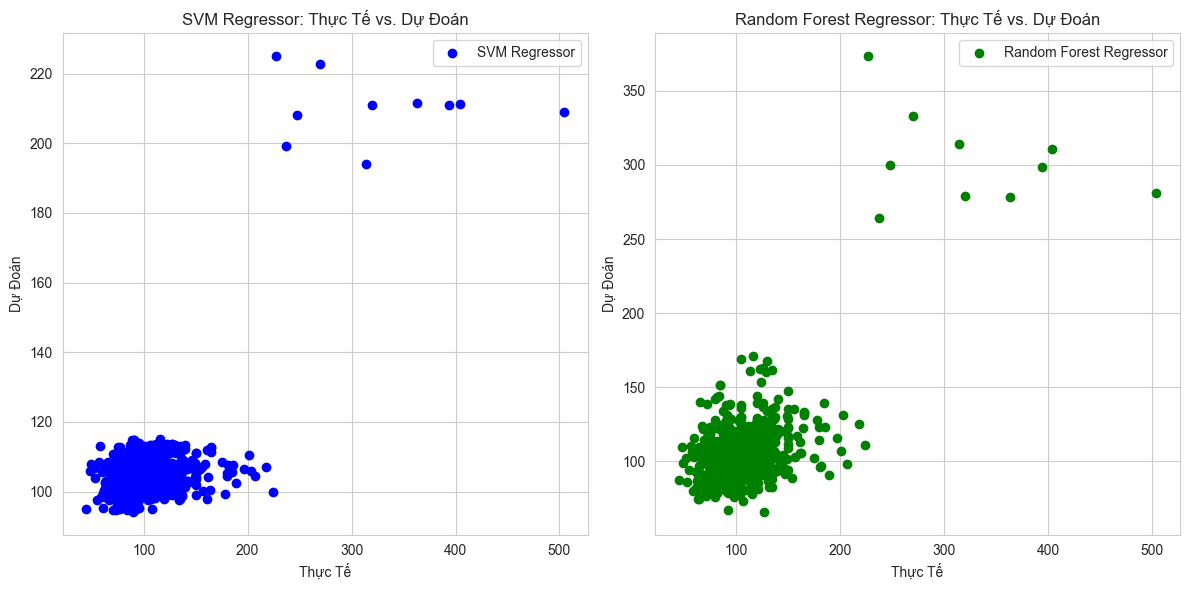

In [46]:
import matplotlib.pyplot as plt

# Vẽ đồ thị dự đoán so với thực tế
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svm, color='blue', label='SVM Regressor')
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('SVM Regressor: Thực Tế vs. Dự Đoán')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regressor')
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Random Forest Regressor: Thực Tế vs. Dự Đoán')
plt.legend()

plt.tight_layout()
plt.show()




**Nhận xét:** Như đã nói, với đồ thị này các điểm càng nằm gần đường thẳng 45 độ sẽ chứng minh mô hình của ta đang dự đoán tốt. Thế nhưng nhìn vào đồ thị, ta thấy rằng với thời gian xe buýt đi không lớn thì các điểm mới gom cụm gần đường này. Ngoài ra, khi thời gian xe buýt đi khá lớn (xảy ra nhiễu do tình hình giao thông, sự kiện bất ngờ,... những yếu tố không được đưa vào trong mô hình) thì dự đoán so với thực tế khá sai lệch. Điều này khẳng định mô hình vẫn chưa thật sự hoạt động tốt với những giá trị nhiễu. Nguyên nhân chủ yếu là sự khuyết thiếu trong tập dữ liệu được cung cấp khi không thể dự đoán nhiều về tình hình giao thông, luồng xe cộ, các địa điểm như trường học, chợ,...

###  Đồ Thị Residuals (Sai Số Dự Đoán)
Vẽ đồ thị sai số giữa giá trị dự đoán và giá trị thực tế. Điều này giúp bạn nhận biết các mẫu dữ liệu mà mô hình của ta dự đoán sai lệch nhiều nhất.

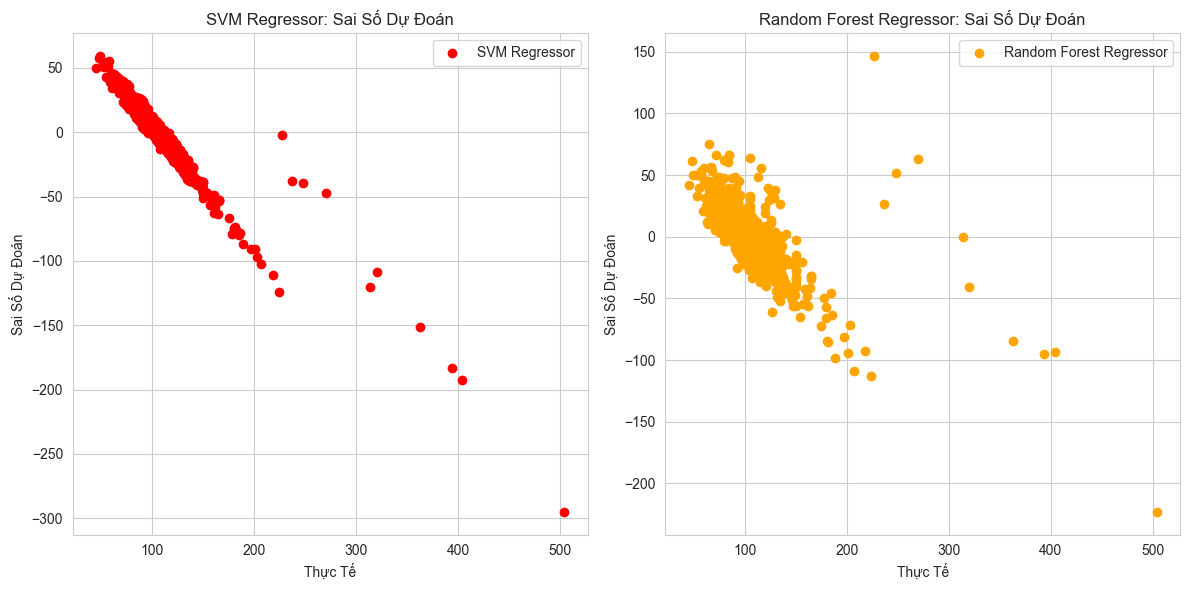

In [47]:
# Vẽ đồ thị sai số dự đoán
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svm - y_test, color='red', label='SVM Regressor')
plt.xlabel('Thực Tế')
plt.ylabel('Sai Số Dự Đoán')
plt.title('SVM Regressor: Sai Số Dự Đoán')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf - y_test, color='orange', label='Random Forest Regressor')
plt.xlabel('Thực Tế')
plt.ylabel('Sai Số Dự Đoán')
plt.title('Random Forest Regressor: Sai Số Dự Đoán')
plt.legend()

plt.tight_layout()
plt.show()

Nhắc lại, với đồ thi sai số dự đoán, khoảng cách giữa các điểm trên đồ thị và đường y = 0 cho thấy mức độ sai số. Nếu các điểm nằm gần đường này, sai số thấp, ngược lại, nếu các điểm nằm xa đường y = 0, sai số lớn. Nếu các điểm trên đồ thị sai số nằm phía trên đường y = 0, điều này ngụ ý rằng mô hình dự đoán quá cao so với giá trị thực tế. Ngược lại, nếu các điểm nằm dưới đường y = 0, mô hình dự đoán thấp hơn so với giá trị thực tế.

Đồ thị trong hai mô hình của chúng ta đều phân bố khá tương tự nhau. Đều có một số điểm ở phía dương và một số điểm ở phía âm. Cũng như với đồ thị trên, ta có thể thấy 2 mô hình ta đang xây dựng có thể dự đoán tương đối với các điểm ít biến động. Hay nói cách khác là xe buýt chạy trong những trường hợp bình thường. Thế nhưng, khi gặp sự cố khiến thời gian chạy tăng lên thì mô hình sẽ có sai số rất cao. Lý giải cho điều này hoàn toàn tương tự với đồ thị ở trên.

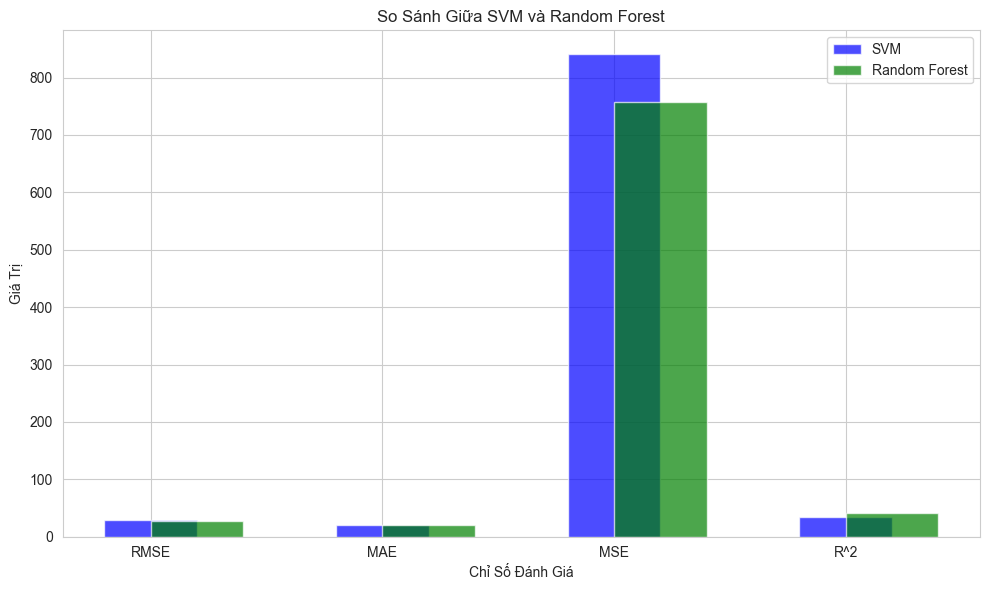

In [48]:
import matplotlib.pyplot as plt

# Danh sách các chỉ số đánh giá và giá trị tương ứng từ SVM và Random Forest
evaluation_metrics = ['RMSE', 'MAE', 'MSE', 'R^2']
svm_scores = [rmse_svm, mae_svm, mse_svm, r2_svm*100]
rf_scores = [rmse_rf, mae_rf, mse_rf, r2_rf*100]

# Vẽ đồ thị so sánh giữa SVM và Random Forest cho từng chỉ số đánh giá
plt.figure(figsize=(10, 6))

x = range(len(evaluation_metrics))

plt.bar(x, svm_scores, width=0.4, label='SVM', color='b', align='center', alpha=0.7)
plt.bar(x, rf_scores, width=0.4, label='Random Forest', color='g', align='edge', alpha=0.7)

plt.xlabel('Chỉ Số Đánh Giá')
plt.ylabel('Giá Trị')
plt.title('So Sánh Giữa SVM và Random Forest')
plt.xticks(x, evaluation_metrics)
plt.legend()
plt.tight_layout()
plt.show()

### Đồ Thị Phân Phối Sai Số (Residual Distribution Plot)
Vẽ histogram của các sai số (chênh lệch giữa giá trị dự đoán và giá trị thực tế) để xem xét phân phối của chúng. Nếu sai số gần với phân phối chuẩn, mô hình của bạn có thể hoạt động tốt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

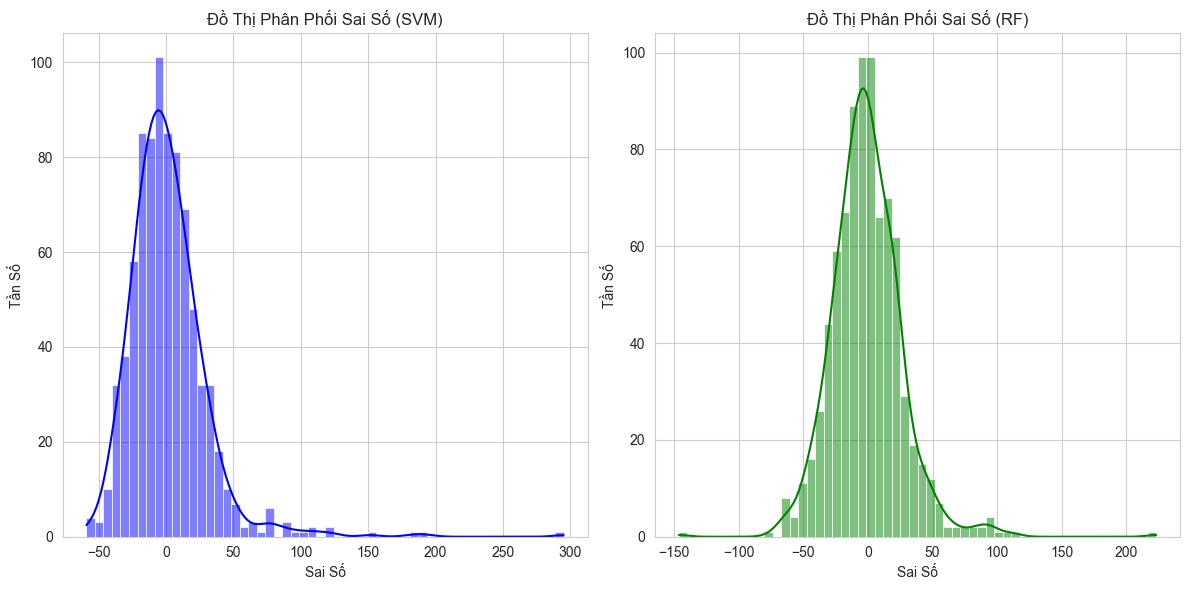

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Tính sai số (chênh lệch giữa giá trị dự đoán và giá trị thực tế)
residuals_svm = y_test - y_pred_svm
residuals_rf = y_test - y_pred_rf

# Vẽ đồ thị phân phối sai số và phân phối chuẩn để so sánh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_svm, kde=True, color='blue')
plt.xlabel('Sai Số')
plt.ylabel('Tần Số')
plt.title('Đồ Thị Phân Phối Sai Số (SVM)')

plt.subplot(1, 2, 2)  # Đổi số 1 thành số 2 để vẽ đồ thị trong khung thứ hai
sns.histplot(residuals_rf, kde=True, color='green')  # Thay màu blue thành green hoặc màu khác tùy chọn
plt.xlabel('Sai Số')
plt.ylabel('Tần Số')
plt.title('Đồ Thị Phân Phối Sai Số (RF)')

plt.tight_layout()
plt.show()

Có thể thấy, hai đồ thị phân phối sai số ở cả hai mô hình Support Vector Machine và
Random Forest đều cho ta thấy các phân phối đều tương đối tuân theo phân phối chuẩn. Điều này nói
lên mô hình mà ta đang xây dựng có thể hoạt động tốt.